Predator-Prey model: 
    \begin{eqnarray}
    \text{ Prey:  }\frac{dx}{dt} &=& \alpha x - \beta x \frac{y}{N}\\
    \text{Predator: }\frac{dy}{dt} &=& \gamma \frac{x}{N} y - \delta y
    \end{eqnarray}
    
 where $\alpha$ is the birth rate of the prey, $\beta$ is the rate being eaten by predator; $\gamma$ is the rate of birth by eating prey; $\delta$ is the death rate.
 
 From previous lectures/homework, there is a periodic orbit with a conserved quantity:
 $$
 E = \gamma \frac{x}{N} - \delta \log (x) + \beta \frac{y}{N} - \alpha \log y.
 $$
 
 In the following cell, we consider the deterministic model exactly by simulating the trajectories of this ODE:

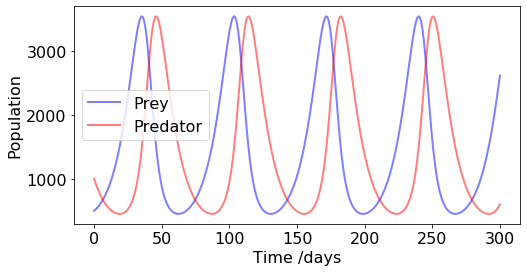

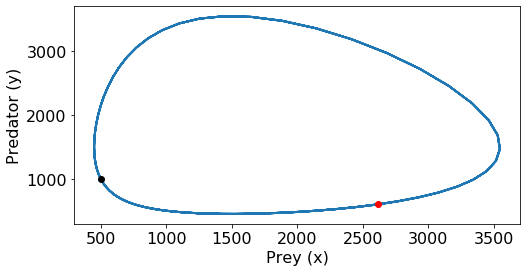

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['lines.linewidth'] = 2
plt.rcParams.update({'font.size': 16})


x0 = 500
y0 = 1000

alpha, beta, gamma, delta = 0.1, 0.1,0.1,0.1

T = 300
dt = 1
t = np.linspace(0, T, np.int(T/dt))

# The predator-prey model differential equations.
def deriv(X, t, alpha, beta, gamma, delta):
    x, y = X
    dxdt = alpha*x - beta*x*y
    dydt = gamma*x*y - delta*y
    return dxdt, dydt

# Initial conditions vector
X0 = x0, y0

# Integrate the equations over the time grid, t.
ret = odeint(deriv, X0, t, args=(alpha,beta,gamma,delta))
x,y = ret.T

# Plot the data on two separate curves for x and y
fig = plt.figure(facecolor='w')
plt.plot(t, x, 'b', alpha=0.5, lw=2, label='Prey')
plt.plot(t, y, 'r', alpha=0.5, lw=2, label='Predator')

plt.xlabel('Time /days')
plt.ylabel('Population')
#plt.ylim(0,1.2)

plt.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.legend()
#legend.get_frame().set_alpha(0.5)
plt.show()

plt.plot(x,y)
plt.plot(x0,y0,'ko')
plt.plot(x[-1],y[-1],'ro')
plt.xlabel('Prey (x)')
plt.ylabel('Predator (y)')
plt.show()
xd = x
yd = y

Now we consider a stochastic model, where both $x$ and $y$ are exactly the populations. 

For each time step from $t$ to $t + dt$: 
    
(1) For each individual of the prey:

- it could give birth to a child with probability $\alpha dt$, in this case the population of the prey will increase by $1$;

- it could be eaten by a predator with probability $\beta \frac{y}{N}dt$, and the population will decrease by $1$.

(2) For each individual of the predator:

- it could give birth with probability $\gamma \frac{x}{N}dt$, and $y$ will increase by $1$;
    
- or $y$ decrease by $1$ when natural death happens with probability $\delta dt$.

In [2]:
def onestep(x,y,alpha,beta,gamma,delta,dt):
    for i in range(x):
        a = np.random.random_sample()
        if a <alpha*dt:
            x = x+1

        b = np.random.random_sample()
        if b < beta*y*dt:
            x = x-1
    for i in range(y):
        a = np.random.random_sample()
        if a < gamma*x*dt:
            y = y+1

        b = np.random.random_sample()
        if b < delta*dt:
            y = y-1
            
    return x,y

In [3]:
x2 = x
y2 = y
x = x0
y = y0
X = [[x0, y0]]
for i in range(np.shape(t)[0]):
  #print(i)
    x,y = onestep(x,y,alpha,beta,gamma,delta,dt)
    X = X+ [ [x,y]  ]
    
X = np.asarray(X)
x = np.asarray([X[i][0] for i in range(np.shape(t)[0])])
y = np.asarray([X[i][1] for i in range(np.shape(t)[0])])


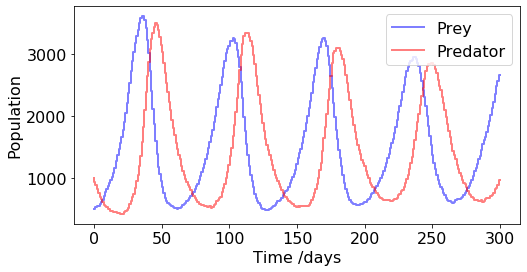

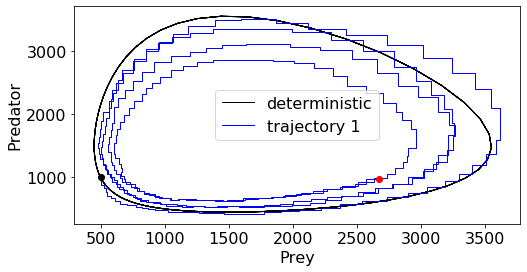

In [4]:

fig = plt.figure(facecolor='w')
#ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
plt.step(t, x, 'b',  alpha=0.5, lw=2, label='Prey')
plt.step(t, y, 'r',  alpha=0.5, lw=2, label='Predator')
plt.xlabel('Time /days')
plt.ylabel('Population')
plt.legend()
plt.show()

plt.plot(xd,yd,'k',lw=1,label='deterministic')
plt.step(x,y,'b',lw=1,label = 'trajectory 1')
#plt.step(x2,y2,'r',label = 'trajectory 2')
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.plot(x0,y0,'ko')
plt.plot(x[-1],y[-1],'ro')
plt.legend()
plt.show()